In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import csv
import numpy as np
from matplotlib import style
import urllib
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

style.use("dark_background")
print(plt.style.available)

['seaborn-notebook', 'ggplot', 'seaborn-white', 'seaborn-deep', 'seaborn-darkgrid', 'dark_background', 'fivethirtyeight', 'seaborn-bright', 'seaborn-poster', 'seaborn-talk', 'seaborn', 'Solarize_Light2', '_classic_test', 'tableau-colorblind10', 'seaborn-paper', 'classic', 'seaborn-colorblind', 'seaborn-whitegrid', 'seaborn-muted', 'seaborn-dark', 'fast', 'seaborn-dark-palette', 'seaborn-ticks', 'grayscale', 'seaborn-pastel', 'bmh']


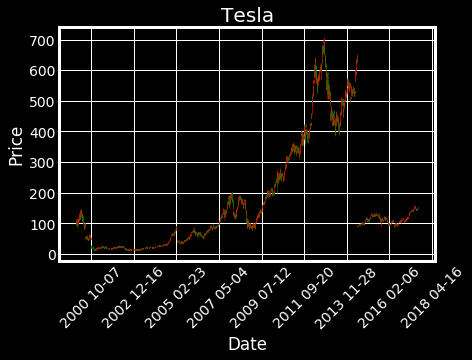

In [11]:
# candlestick graph


def bytespdate2num(fmt, encoding='utf-8'):
    #converts python data to matplotlib data
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock=None):
    
    fig = plt.figure
    ax1 = plt.subplot2grid((1,1), (0,0))
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    
    x = 0
    y = len(date)
    ohlc = []
    
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='g', colordown='r')
    
    for label in ax1.xaxis.get_ticklabels(): #this get the X tick labels
        label.set_rotation(45)
    
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
        
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title("Tesla")
    #plt.legend()
    #plt.subplots_adjust(left=0.09, bottom=0.18, right=0.94, top=0.95, wspace=0.2, hspace=0)
    plt.show()
    
graph_data()